# Solar Radiation Prediction

## Abstract
This project consists of four months data from September to December 2016 taken from HI-SEAS weather station between Mission IV and Mission V. The study shows how accurately Machine learning models can predict solar radiation with the help of the provided features i.e., Temperature, Humidity, Time of Day, Wind Speed, Wind Direction, Pressure. The provided dataset had no NULL and missing values, but it had the wrong class objects for data and time columns. Moreover, it was noticed that there was no measurement in certain time intervals. The data and time columns were converted to datetime objects and missing readings were plugged in through linear interpolation. Through feature engineering it was studied which features had the strongest correlation with solar radiation. Temperature was found to have the strongest correlation with solar radiation. Pressure and Wind Speed had a weak correlation with radiation. Humidity and Wind Direction showed similar but weak correlation with solar radiation.
Linear regression was used as a baseline machine learning model and its R2 score for test data was very low i.e., 58%. Hence, it was essential to implement some other models that could best capture the behavior of the dataset. Since the data is kind of time-series, the primary 80 percent of data allocated to the training and the rest to the testing data. Random forest, Gradient Boosting and LSTM were implemented for comparison and training the data. Machine learning output regarding feature importance revealed that Pressure and Speed had the lowest effect on the performance of machine which was consistence the results of feature engineering section. three models and hence were not considered further. Temperature, Humidity and Time of Day were found to be the most features in training of the models. Since these three features i.e., Temperature, Humidity and Time of Day had different ranges, so normalization was performed on them to get them to the same scale. Hyperparameter tuning was the next step done to find the best parameters for Model training. In this regard, for Gradient Boosting and Random forest models, GridSearch algorithm was used to find the best performance of each model. The results illustrated that LSTM had the best performance with R2 score of 94%, then Gradient Boosting with R2 score of 76% and lastly random forest with R2 score of also 76%.

## Introduction

We took the dataset from this website i.e.: https://www.kaggle.com/datasets/dronio/SolarEnergy

<b>Research question</b>: Our main goal for this project was to derive a Machine Learning model which could accurately predict solar radiation based on the provided features in the dataset.

<b>Problem Statement</b>: The dataset provides meteorological information from the HI-SEAS weather station for the four months between Mission IV and Mission V in 2016 i.e. September through December. Through this dataset we are trying to find relation between solar radiation and other given parameters i.e. pressure, temperature, windspeed etc. Machine learning model accuracy will determine which features contribute most to the prediction of solar radiation.

<b>Appropriate ML Algorithms</b>: <br>
 <b>1)Linear Regression <br></b>
The linear model was used to predict solar radiation based on several features. It was considered as a baseline model for comparison with other models. After predicting solar radiation, it was determined that the accuracy was low, so more complex models were developed.  

 <b>2)Random Forest</b> <br>
Random Forest is a machine learning algorithm that itself is a combination of many decision trees. Random forests can be used for both classification when the dependent values are discrete as well as for regression when the dependent values are continuous. The average of multiple decision trees is taken, which helps to improve the overall accuracy of the model. This technique is more suitable when the relation ship between variables is non-linear.

 <b>3)Gradient Boosting </b><br>
Gradient Boosting is a popular machine-learning algorithm for both continuous and discrete models(regressor/classifier).
It is a kind of boosting machine algorithm, which means it performs based on a combination of simple models. It works by getting an initial fit to the data and the second model works on the accuracy and error of this fit. The second model tries to minimize this difference.

 <b>4)LSTM Model </b><br>
LSTM models are subset of recurrent neural networks (RNN) that have short term memory and using the prevoius information.
Therefore a deep network which benefit from a LSTM model can forecast the future by using the previous sequence of data.
Hence the data of this study is kind of time series, LSTM model was utilized .

The main steps followed for this project were:
1) Data cleaning and preprocessing. <br>
2) Data visualization and analysis. <br>
3) Selection of significant features.<br>
4) Applying machine learning algorithms. <br>
5) A comparison for models accuracy. <br>

#### References: 
1)https://www.youtube.com/watch?v=yIYKR4sgzI8 <br>
2)https://www.youtube.com/watch?v=v6VJ2RO66Ag <br>
3)https://www.youtube.com/watch?v=zPG4NjIkCjc <br>
4)https://www.kaggle.com/code/lukashenry/radiation-time-serie-predictions <br>
5)https://www.kaggle.com/code/runphilrun/hi-seas-solar-radiation-prediction <br>
6)https://www.kaggle.com/code/sarahvch/investigating-solar-radiation <br>
7)https://www.kaggle.com/code/runphilrun/hi-seas-solar-radiation-prediction <br>
8)https://www.frontiersin.org/articles/10.3389/feart.2021.596860/full <br>

In [180]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime,timedelta
from pytz import timezone 
import pytz 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error
import tensorflow as tf
import io

In [181]:
from google.colab import files
uploaded = files.upload()

Saving SolarPrediction.csv to SolarPrediction (2).csv


In [182]:
# Reading data from SolarPrediction.csv file
SD = pd.read_csv(io.BytesIO(uploaded['SolarPrediction.csv']))

# SD i.e. Solar Radiation will be used to call dataframe of .csv file
SD.head(5) 

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


## Units

The date is in yyyy-mm-dd format. <br>
The local time of day is in hh:mm:ss 24-hour format. <br>
Solar radiation is in watts per meter^2. <br>
Temperature is in degrees Fahrenheit. <br>
Humidity is in percent. <br>
Barometric pressure is in Hg. <br>
Wind direction is in degrees. <br>
Wind speed is in miles per hour. <br>
Sunrise/sunset is in Hawaii time.<br>

## Data Cleaning & Preprocessing

In [183]:
SD.shape

(32686, 11)

The dataset contains 32686 rows with 11 columns.

In [184]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


We can see from the information provided above that there are no missing values in our dataset. It can also be noticed quite distinctly that some parameters i.e. Data,Time, TimeSunRise, TimeSunSet do not correspond to the correct class. We would have to convert them to datetime objects for correct manipulation of the dataset.

In [185]:
# Concatenating Data and Time as single series
SD['DateTime']= SD['Data'].str.split(' ', expand=True).iloc[:,0] + ' '+ SD['Time']

# Concatenating Data and TimeSunSet as single series
SD['TimeSunSet']= SD['Data'].str.split(' ', expand=True).iloc[:,0] + ' '+ SD['TimeSunSet']

# Concatenating Data and TimeSunRise as single series
SD['TimeSunRise']= SD['Data'].str.split(' ', expand=True).iloc[:,0] + ' '+ SD['TimeSunRise']

# DateTime,TimeSunSet,TimeSunRise columns are being converted to datetime object
SD['DateTime'] = pd.to_datetime(SD['DateTime'])
SD['TimeSunSet'] = pd.to_datetime(SD['TimeSunSet'])
SD['TimeSunRise'] = pd.to_datetime(SD['TimeSunRise'])

# Removing now redundant columns Data and Time from dataframe
SD.drop(columns=['Data', 'Time','UNIXTime'], inplace=True)

# Renaming WindDirection column to WindDirection for synchronization
SD.rename(columns = {'WindDirection(Degrees)':'WindDirection'}, inplace = True)

# Displaying first 5 rows of the dataframe
SD.head(5)

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DateTime
0,1.21,48,30.46,59,177.39,5.62,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-29 23:55:26
1,1.21,48,30.46,58,176.78,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-29 23:50:23
2,1.23,48,30.46,57,158.75,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-29 23:45:26
3,1.21,48,30.46,60,137.71,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-29 23:40:21
4,1.17,48,30.46,62,104.95,5.62,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-29 23:35:24


The time provided is local time i.e. Huwaiian time and is in 24hr period. Data and Time is concatenated in a single column i.e. DateTime to be used in further processing of data.

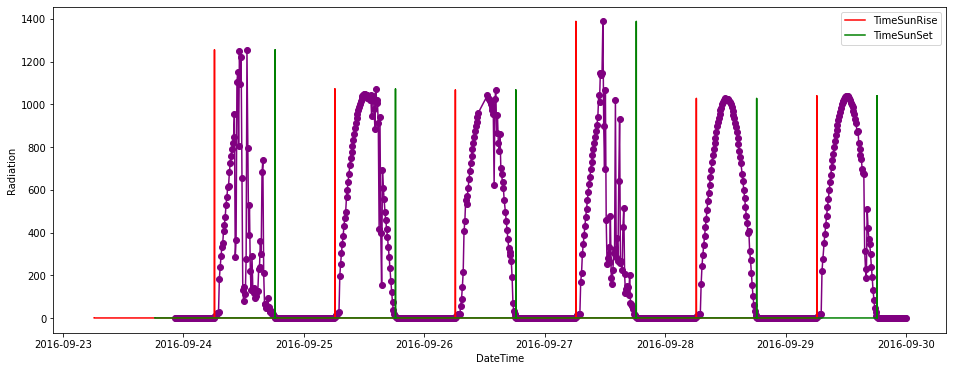

In [186]:
# Plotting Radiation Vs Date-Time
plt.figure(figsize=(16,6))

x0=0

# No of rows
xfinal=1700

# Step between fetching row values
time_step=2

# DateTime and Solar radiation are plotted
plt.plot(SD['DateTime'].iloc[x0:xfinal:time_step],SD['Radiation'].iloc[x0:xfinal:time_step],'-o',color='purple')

# TimeSunset and Solar radiation are plotted
plt.plot(SD['TimeSunRise'].iloc[x0:xfinal:time_step],SD['Radiation'].iloc[x0:xfinal:time_step],'-',color='red',label='TimeSunRise')

# TimeSunRise and Solar radiation are plotted
plt.plot(SD['TimeSunSet'].iloc[x0:xfinal:time_step],SD['Radiation'].iloc[x0:xfinal:time_step],'-',color='green',label='TimeSunSet')

plt.legend()
plt.xlabel("DateTime")
plt.ylabel('Radiation')
plt.show()

As seen from the plot above that DateTime has been correctly manipulated. There should be no solar radiation after sunset and before sunrise and it is the case.

In [187]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Radiation      32686 non-null  float64       
 1   Temperature    32686 non-null  int64         
 2   Pressure       32686 non-null  float64       
 3   Humidity       32686 non-null  int64         
 4   WindDirection  32686 non-null  float64       
 5   Speed          32686 non-null  float64       
 6   TimeSunRise    32686 non-null  datetime64[ns]
 7   TimeSunSet     32686 non-null  datetime64[ns]
 8   DateTime       32686 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(2)
memory usage: 2.2 MB


Hence, Datetime,TimeSunSet,TimeSunRise has been correctly manipulated to datetime object.

In [188]:
SD.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


The maximum solar radiation is 1601 W/m^2 while the minimum is 1.11 W/m^2. Such difference in min and max and also considering standard deviation of data, it can be seen that the data collected is for both days and nights. Solar radiation must peak during day time (can be subject to cloudy conditions etc) and will be considerably less during night time. There is very little standard deviation of data in case of Pressure with values more and less having same figures. There is considerable variation in values for Humidity, WindDirection,Speed, Temperature which seem reasonsable given the cycles of days and nights.  


In [189]:
# Data is converted to ascending based on DataTime column
SD =SD.sort_values(by=['DateTime'],ascending=True)

# Index of the values is reset 
SD = SD.reset_index()

# There was no need for index column hence it was deleted.
SD.drop(columns=['index'], inplace=True)

SD.head(5)

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DateTime
0,2.58,51,30.43,103,77.27,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00,2016-09-01 00:00:08
1,2.83,51,30.43,103,153.44,9.00,2016-09-01 06:07:00,2016-09-01 18:38:00,2016-09-01 00:05:10
2,2.16,51,30.43,103,142.04,7.87,2016-09-01 06:07:00,2016-09-01 18:38:00,2016-09-01 00:20:06
3,2.21,51,30.43,103,144.12,18.00,2016-09-01 06:07:00,2016-09-01 18:38:00,2016-09-01 00:25:05
4,2.25,51,30.43,103,67.42,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00,2016-09-01 00:30:09


In [190]:
# Below code lines just place the column Date_time to the start of the dataframe for visually appealing data frame
columns = list(SD.columns)
columns = [columns[-1]] + columns[:-1]
SD = SD[columns]

#Adding a new column i.e. DateTime seconds that shows the time as seconds passed on that day
SD['DT_Seconds'] = SD['DateTime'].dt.hour*3600 + SD['DateTime'].dt.minute*60 + SD['DateTime'].dt.second

SD.head(5)

,DateTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DT_Seconds
0,2016-09-01 00:00:08,2.58,51,30.43,103,77.27,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00,8
1,2016-09-01 00:05:10,2.83,51,30.43,103,153.44,9.00,2016-09-01 06:07:00,2016-09-01 18:38:00,310
2,2016-09-01 00:20:06,2.16,51,30.43,103,142.04,7.87,2016-09-01 06:07:00,2016-09-01 18:38:00,1206
3,2016-09-01 00:25:05,2.21,51,30.43,103,144.12,18.00,2016-09-01 06:07:00,2016-09-01 18:38:00,1505
4,2016-09-01 00:30:09,2.25,51,30.43,103,67.42,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00,1809


In [191]:
# Checking for duplicate DateTime in our dataset 
SD.DateTime.duplicated().sum()

0

There are no duplicate values in the dataset.

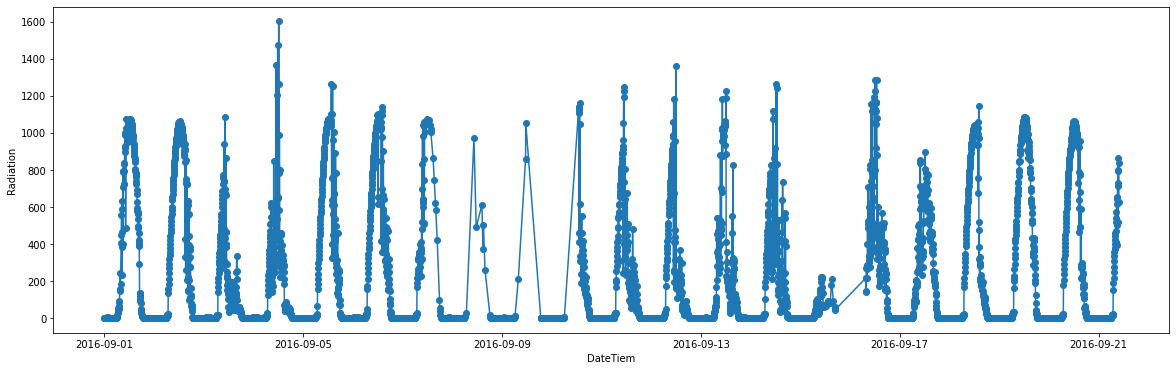

In [192]:
plt.figure(figsize=(20,6))

# from 2016-09-01 to 2016-09-21
plt.plot(SD['DateTime'][0:5000:],SD['Radiation'][0:5000:],'-o')

plt.ylabel("Radiation")
plt.xlabel("DateTiem")

plt.show()

From the plot above it can be seen clearly that some readings are missing from data e.g between 2016-09-05 to 2016-09-13. There are too few points which can be seen. To correct this linear interpolation is used which will generate more points. Linear interpolation will be used so that the trend of the graph does not change i.e. do not want to convert night readings to day etc, rather have more data for model training. Linear interpolation will be implemented for all features.

In [193]:
list_date_time=len(list(SD['DateTime']))

i = 1
# Initial time 
sumdiff = timedelta(seconds=0)
while i < list_date_time:
    # Time difference of DateTime objects is being calculated
    sumdiff += SD['DateTime'][i] - SD['DateTime'][i-1]
    i = i + 1

avg_value_datetime = sumdiff / (list_date_time - 1)
avg_value_datetime=avg_value_datetime.round(freq='s')
print("The average difference in datetime values: ",avg_value_datetime)

The average difference in datetime values:  0 days 00:05:22


The purpose of the above code is to calculate the average difference in two consective values of DateTime column. We can see that that the average difference is approximately 5 minutes.

In [194]:
# How many values exceed the time difference average
i = 1
diff = timedelta(seconds=0)
count=0
while i < list_date_time:
    diff = SD['DateTime'][i] - SD['DateTime'][i-1]
    
    if diff>avg_value_datetime:
        # This count variable adds when the difference in two consective values exceed the avg difference.
        count+=1
    i = i + 1

print("Number of values that exceed the average difference: ",count)

Number of values that exceed the average difference:  417


The above code calculate how many values in DateTime column exceed that average difference. There are 417 values in the dateTime column that exceed the 5 minutes interval in consective readings. 

In [195]:
# Add a null row to the dataframe
copy_SD=SD.copy()

list_date_time=len(list(SD['DateTime']))
i = 1
diff = timedelta(seconds=0)
count=0
while i < list_date_time:
    
    # Calculating the difference between two consective values of dateTime column
    diff = copy_SD['DateTime'][i] - copy_SD['DateTime'][i-1]
    
    # Finding the number of rows to be inserted
    no_of_rows_to_be_inserted=int(diff/avg_value_datetime)
    
    # Seeing if the difference between two consective values exceed the average difference.
    if diff>avg_value_datetime:
        
        # Adding average difference to the first value of the two consective values of dateTime column
        data_time_val_insertion = copy_SD['DateTime'][i-1]+avg_value_datetime
        
        # Iteration of number of rows
        for j in range(no_of_rows_to_be_inserted):
            
            row=[]
            
            # Total number of columns in a dataframe are 9
            for k in range(10):
                if k==0:
                    # Appending time to first element of the list
                    #data_time_val_insertion.replace(microsecond=0) 
                    row.append(data_time_val_insertion)
                    
                else:
                    if k==7:
                        # Appending TimeSunRise of the same day
                        row.append(copy_SD['TimeSunRise'][i])
                    elif k==8:
                        # Appending TimeSunSet of the same day
                        row.append(copy_SD['TimeSunSet'][i])
                    elif k==9:
                        row.append((data_time_val_insertion.time().hour * 60 + data_time_val_insertion.time().minute) * 60 + data_time_val_insertion.time().second)
                    else:
                        # All other values will be null, open to linear interpolation
                        row.append(np.nan)
            
            # Calculating the time of next possible row that would be inserted.
            data_time_val_insertion+=avg_value_datetime
            
            # Row inserted in to dataframe
            SD.loc[len(SD.index)] = row
        
    i = i + 1
    

The above code plugs in NULL rows with the exception of TimeSunRise and TimeSunSet values in that same row because SunSet Time and SunRise time for that day would be the same. Even the maximum missing values were found to be less than 24hrs of the same day hence those values can be plugged in from the data of the same day. The way the code works is it calculates the difference in DateTime consective values, if that difference exceeds 5 minutes, then it calculats the difference between two consevtive rows and divides by average time difference to get the number of rows to be insertd e.g. 2016-09-01 00:05:10.0 and 2016-09-01 00:20:06.00 would require two rows to be inserted between them.

In [196]:
SD =SD.sort_values(by=['DateTime'],ascending=True)
SD = SD.reset_index()
SD.drop(columns=['index'], inplace=True)
# Removing the microseconds in the DateTime column
SD['DateTime'] = pd.to_datetime(SD['DateTime'].dt.strftime("%Y/%m/%d, %H:%M:%S"))
SD.head(5)

,DateTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DT_Seconds
0,2016-09-01 00:00:08,2.58,51.0,30.43,103.0,77.27,11.25,2016-09-01 06:07:00,2016-09-01 18:38:00,8
1,2016-09-01 00:05:10,2.83,51.0,30.43,103.0,153.44,9.00,2016-09-01 06:07:00,2016-09-01 18:38:00,310
2,2016-09-01 00:10:32,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 06:07:00,2016-09-01 18:38:00,632
3,2016-09-01 00:15:54,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 06:07:00,2016-09-01 18:38:00,954
4,2016-09-01 00:20:06,2.16,51.0,30.43,103.0,142.04,7.87,2016-09-01 06:07:00,2016-09-01 18:38:00,1206


The dataframe is sorted because the new rows were being appended to the end of the dataframe hence there is a need to sort the dataframe again based on DateTime column so those new rows are placed in the correct position.

In [197]:
# Code for linear interpolation
SD['Radiation']=SD['Radiation'].interpolate(method="linear")
SD['Temperature']=SD['Temperature'].interpolate(method="linear")
SD['Pressure']=SD['Pressure'].interpolate(method="linear")
SD['Humidity']=SD['Humidity'].interpolate(method="linear")
SD['WindDirection']=SD['WindDirection'].interpolate(method="linear")
SD['Speed']=SD['Speed'].interpolate(method="linear")
SD.head(5)

,DateTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DT_Seconds
0,2016-09-01 00:00:08,2.580000,51.0,30.43,103.0,77.27,11.250000,2016-09-01 06:07:00,2016-09-01 18:38:00,8
1,2016-09-01 00:05:10,2.830000,51.0,30.43,103.0,153.44,9.000000,2016-09-01 06:07:00,2016-09-01 18:38:00,310
2,2016-09-01 00:10:32,2.606667,51.0,30.43,103.0,149.64,8.623333,2016-09-01 06:07:00,2016-09-01 18:38:00,632
3,2016-09-01 00:15:54,2.383333,51.0,30.43,103.0,145.84,8.246667,2016-09-01 06:07:00,2016-09-01 18:38:00,954
4,2016-09-01 00:20:06,2.160000,51.0,30.43,103.0,142.04,7.870000,2016-09-01 06:07:00,2016-09-01 18:38:00,1206


In [198]:
SD.shape

(35121, 10)

Now there are 35121 rows, an increase of approximately 7%.

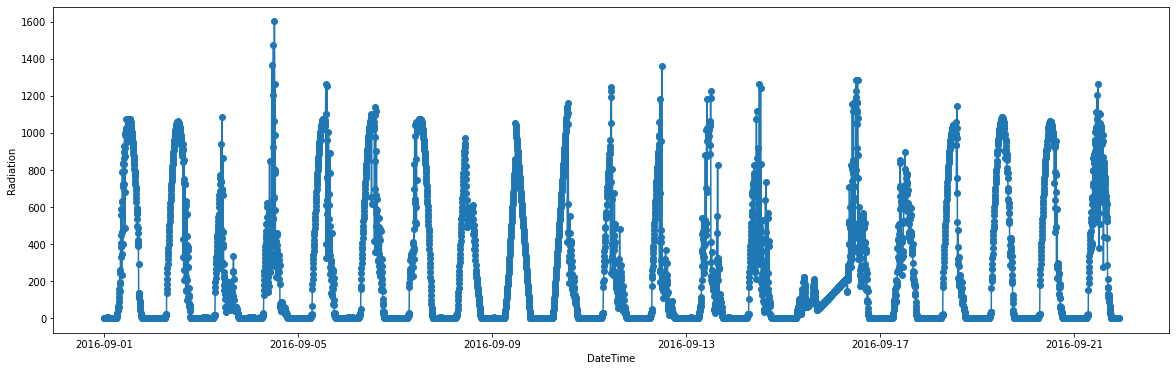

In [199]:
plt.figure(figsize=(20,6))

# from 2016-09-01 to 2016-09-21
no_of_rows_fetched=6000
plt.plot(SD['DateTime'][0:no_of_rows_fetched:],SD['Radiation'][0:no_of_rows_fetched:],'-o')

plt.xlabel("DateTime")
plt.ylabel("Radiation")

plt.show()

It can be see from the plot e.g between 2016-09-05 to 2016-09-13, there are more readings now but the trend of the graph is maintained i.e. there is no bigger radiation value where there should be zero e.g. during night and day cycles.

In [200]:
# How many values exceed the time difference average
i = 1
diff = timedelta(seconds=0)
count=0
while i < list_date_time:
    diff = SD['DateTime'][i] - SD['DateTime'][i-1]
    
    if diff>avg_value_datetime:
        #print(diff)
        #print(avg_value_datetime)
        #print(" ")
        count+=1
    i = i + 1

print("Number of values that exceed the average difference is now: ",count)

Number of values that exceed the average difference is now:  0


Due to plugging in missing readings, the number of values that exceed the average difference is now 0 in DateTime column so the data now has uniform time intervals.

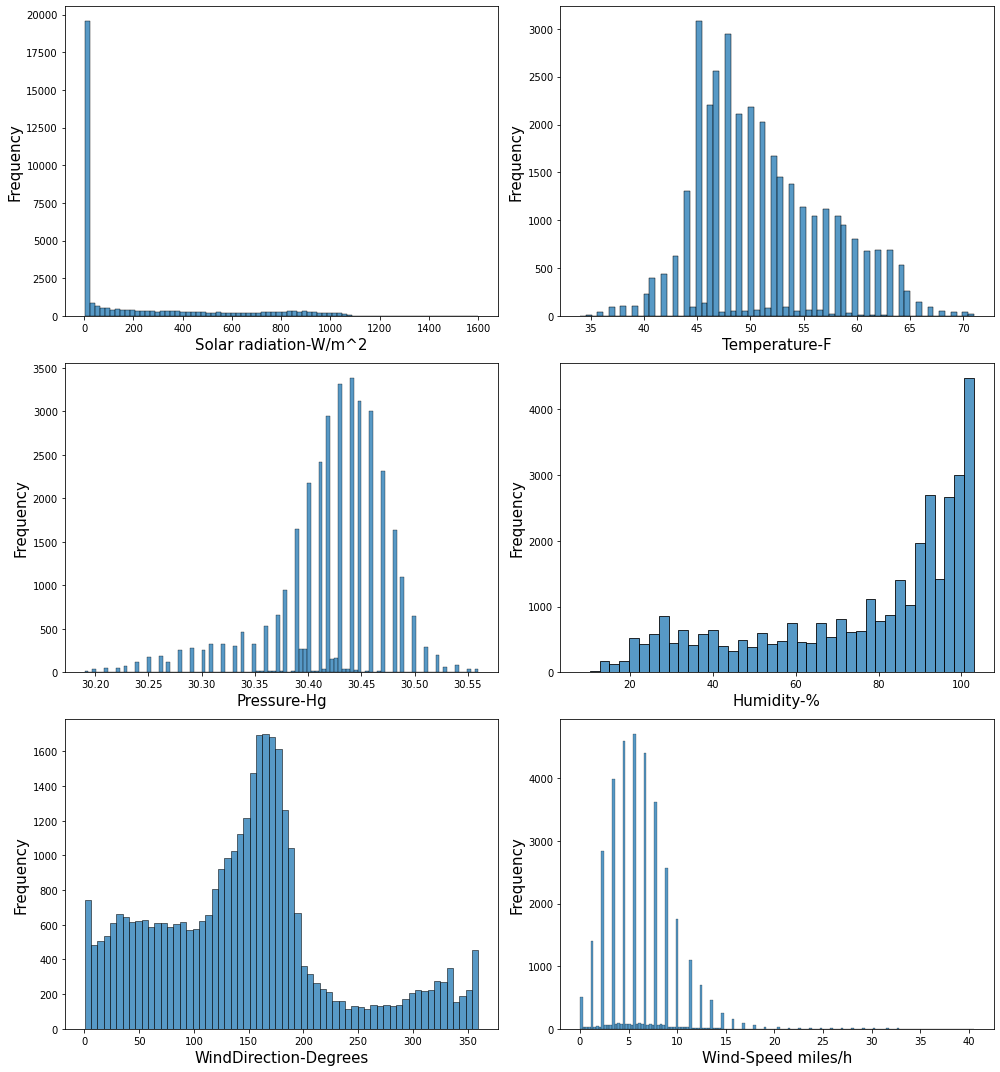

In [201]:
fig, ax = plt.subplots(nrows =3, ncols = 2, figsize = (14, 15))

# Plotting histograms
sns.histplot(SD['Radiation'], ax = ax[0][0])
ax[0][0].set_xlabel('Solar radiation-W/m^2', fontsize = 15)

#Frequecy just defines the number of times a value occured in dataset
ax[0][0].set_ylabel('Frequency', fontsize = 15)

sns.histplot(SD['Temperature'], ax = ax[0][1])
ax[0][1].set_xlabel('Temperature-F', fontsize = 15)
ax[0][1].set_ylabel('Frequency', fontsize = 15)

sns.histplot(SD['Pressure'], ax = ax[1][0])
ax[1][0].set_xlabel('Pressure-Hg', fontsize = 15)
ax[1][0].set_ylabel('Frequency', fontsize = 15)

sns.histplot(SD['Humidity'], ax = ax[1][1])
ax[1][1].set_xlabel('Humidity-%', fontsize = 15)
ax[1][1].set_ylabel('Frequency', fontsize = 15)

sns.histplot(SD['WindDirection'], ax = ax[2][0])
ax[2][0].set_xlabel('WindDirection-Degrees', fontsize = 15)
ax[2][0].set_ylabel('Frequency', fontsize = 15)

sns.histplot(SD['Speed'], ax = ax[2][1])
ax[2][1].set_xlabel('Wind-Speed miles/h', fontsize = 15)
ax[2][1].set_ylabel('Frequency', fontsize = 15)

fig.tight_layout()
plt.show()

Analysis of the data: <br>
1) It can be seen from above that most features follow a skewed distribution.<br>
2) More than fifty percent of the solar radiation is between 0 and 200 range which is to be expected becasuse of night cycle. (no solar radiation at night)<br>
3) It can also be inferred from the plots that high wind speed was an exteme rare case i.e. an outlier.<br>
4) Temperatures below 40 F and exceeding 60 F were also rare case.<br>
5) Pressure values fluctuate ever so slightly and not much.<br>

## Feature Engineering and correlation analysis

After preliminary analysis of the dataset, the next step is to define which features will be used in building of the ML model. The correlation analyses helps to identify the patterns either linear or non-linear between the solar radiation and the other features.

Considering all the information contained in the dataset as useful data for the prediction of the target variable is implemented in the first step of feature engineering.

Correlation is a measure to evaluate the linear relationship between two variables. Two variables are posetivley correlated when they increase and decrease together while negative correlation is vice versa. A value close to 1 indicates a strong linear positive correlation between the two variables while a value close to -1 indicates a strong negative linear correlation.

Zero correlation is only valid if there is no linear relationship between the vaiables. In this condition, the two variables are said to be uncorrelated. This can happen even when variables are related in some other non-linear fashion such as exponential, more than linear, quadratic, etc.

The correlation line in the Radiation-Temp graph enters negative values which is not a matter study in this project. Generally, net radiation is usually a negative value at night as there is no incoming solar radiation. However, in this study the positive values of Radiation is of interest since they result in production of electricty. Moreover, there has been no measurement for negative values of Radiation.

The following scatter graphs illustrate the variation of solar radiation against other features of the dataset:

[[1.         0.73552712]
 [0.73552712 1.        ]]


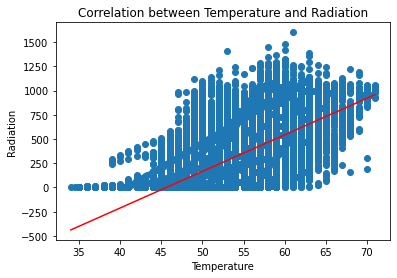

In [202]:
x = SD['Temperature']
y = SD['Radiation']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between Temperature and Radiation')
plt.xlabel('Temperature')
plt.ylabel('Radiation')
x_axis = np.unique(x)
y_axis = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
plt.plot(x_axis, y_axis, color='red')
plt.show()

[[1.         0.10893557]
 [0.10893557 1.        ]]


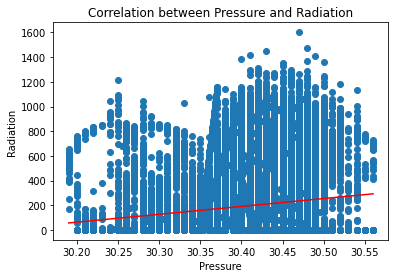

In [203]:
x = SD['Pressure']
y = SD['Radiation']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between Pressure and Radiation')
plt.xlabel('Pressure')
plt.ylabel('Radiation')
x_axis = np.unique(x)
y_axis = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
plt.plot(x_axis, y_axis, color='red')
plt.show()

The correlation line plotted based on the scatter diagram of Radiation vs Pressure shows that as long the pressure increases the amount of Radiation increases.

[[ 1.         -0.22711303]
 [-0.22711303  1.        ]]


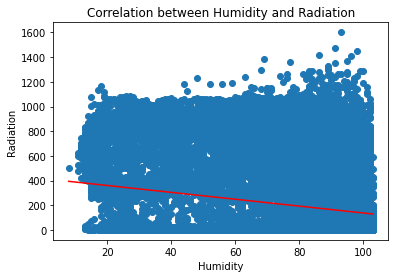

In [204]:
x = SD['Humidity']
y = SD['Radiation']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between Humidity and Radiation')
plt.xlabel('Humidity')
plt.ylabel('Radiation')
x_axis = np.unique(x)
y_axis = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
plt.plot(x_axis, y_axis, color='red')
plt.show()

By comparing the previous two graphs, it is visible that the linear relationship between Humidity and Radiation is stronger than Pressure and Radiation though its value is negative. 

[[ 1.         -0.23619406]
 [-0.23619406  1.        ]]


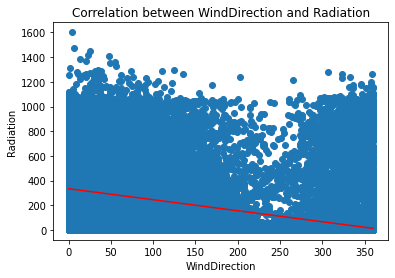

In [205]:
x = SD['WindDirection']
y = SD['Radiation']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between WindDirection and Radiation')
plt.xlabel('WindDirection')
plt.ylabel('Radiation')
x_axis = np.unique(x)
y_axis = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
plt.plot(x_axis, y_axis, color='red')
plt.show()

The correlation between WindDirection and Radiation is very similar to the correlation between Humidity and Radiation. 

[[1.         0.07483323]
 [0.07483323 1.        ]]


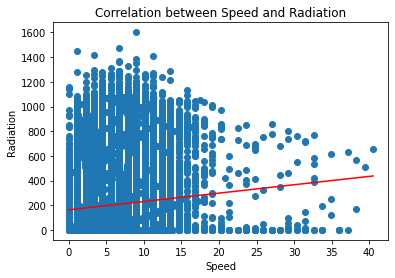

In [206]:
x = SD['Speed']
y = SD['Radiation']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between Speed and Radiation')
plt.xlabel('Speed')
plt.ylabel('Radiation')
x_axis = np.unique(x)
y_axis = np.poly1d(np.polyfit(x, y, 1))(np.unique(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

Again by comparing the previous two graphs, it can be observed that the linear relationship between WindDirection and Radiation is stronger than the one between Speed and Radiation.

In the second step of the feature engineering, identifying the patterns between the features and the target parameter i.e. solar radiation is implemented. A heatmap which is a correlation matrix displays a summary of linear relationships between the various variables.

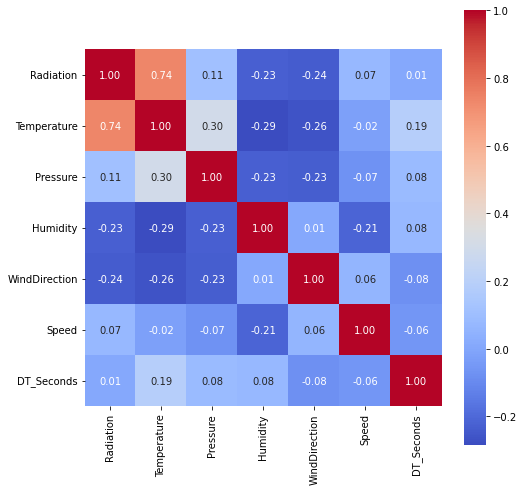

In [263]:
corr = SD.corr(method = "pearson")
#corr = SD.corr(method = "spearman")

f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f")

 According to the correlation graphs and heatmap, it can be concluded that Temperature has the strongest correlation with the Radiation. Two other features including Humidity and WindDirection have approximately the same degree of linear relationship with Radiation. Pressure and Humidity have a weak correlation with Radiation. 

## **Training the model with Linear Regression**

Considered the linear model to be a baseline model. After analyzing the data, it was determined that temperature has the strongest relationship with solar radiation. It will be interesting to see how a linear model performs with this dataset.

Separated variables that needed in Linear Regression model and then added a new column which include the time of the day in seconds. Divided the dataset (df) into features and target variable and then separate them into test and train. Thenafter, used the Linear model to predict the value of radiation. At last, ploted the graph for 5 days between given and predicted solar radiation.

In [208]:
SD_copy = SD #Creating new data set to be used for this part of project
df = SD_copy[['Radiation','Temperature', 'Pressure', 'Humidity','WindDirection','Speed','DT_Seconds']]

In [209]:
X = df.drop(columns=['Radiation'], axis = 1) # Independent Variable / Features*
y = SD.Radiation # Dependent Variable / Target Variable

In [210]:
# Splitting the data set into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) # using only 30% data for test size.

In [211]:
# Activating linear regression model
lr = LinearRegression()

# Training the model with  linear regression
lr.fit(X_train, y_train)

# Evaluating the prediction with the linear model
lr_predict_train = lr.predict(X_train)
lr_predict_test = lr.predict(X_test)

In [212]:
# Checking the score of test and train
test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score of test data:',round(test_score,3))
print('Score of train data:',round(train_score,3))

Score of test data: 0.578
Score of train data: 0.585


Score of the linear regression is not high. Therefore, more complex models need to me implemented.

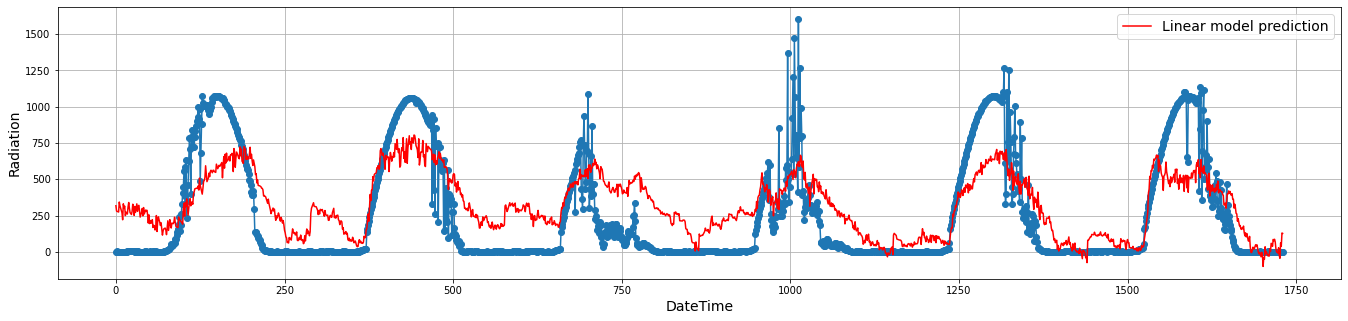

In [213]:
#Carrying out predictions with linear model for the 5-day period
df_five = df.loc[:1730,:] # Include Radiation Values
X_five = X.loc[:1730,:]
y_five_lr = lr.predict(X_five)
#df_five.shape

#Plotting Graph
fig, ax = plt.subplots(figsize = (23,5))
ax.plot(df_five.Radiation,'-o')
ax.plot(df_five.index, y_five_lr, linewidth = 1.5, color = 'red', label = 'Linear model prediction')
ax.set_ylabel('Radiation', fontsize = 14)
ax.set_xlabel('DateTime', fontsize = 14)
ax.grid()
ax.legend(fontsize = 14)
plt.show()

### Discussion

The graphic representation shows that the linear model is capable of predicting the location of the peak solar radiation and matching  the maximum value of solar radiation. However, it appears that it is incapable of accurately predicting periods when solar radiation is low.

This shows that more complicated models are needed to have a better understanding of the relationship between solar radiation and the selected features.



# Gradient Boosting Algorithm

In the previous step, the results revealed that the Linear regression model was unable to capture the trend and behavior of data. Therefore, it is necessary to incorporate a more powerful algorithm to deal appropriatly with the nonlinearity of the data. Hence, in this section Gradient Boosting algorithm has been introduced.


# Defining features and labels

In [214]:
SD_GBOOST=SD
SD_GBOOST

,DateTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet,DT_Seconds
0,2016-09-01 00:00:08,2.580000,51.0,30.43,103.0,77.27,11.250000,2016-09-01 06:07:00,2016-09-01 18:38:00,8
1,2016-09-01 00:05:10,2.830000,51.0,30.43,103.0,153.44,9.000000,2016-09-01 06:07:00,2016-09-01 18:38:00,310
2,2016-09-01 00:10:32,2.606667,51.0,30.43,103.0,149.64,8.623333,2016-09-01 06:07:00,2016-09-01 18:38:00,632
3,2016-09-01 00:15:54,2.383333,51.0,30.43,103.0,145.84,8.246667,2016-09-01 06:07:00,2016-09-01 18:38:00,954
4,2016-09-01 00:20:06,2.160000,51.0,30.43,103.0,142.04,7.870000,2016-09-01 06:07:00,2016-09-01 18:38:00,1206
...,...,...,...,...,...,...,...,...,...,...
35116,2016-12-31 23:35:02,1.220000,41.0,30.34,83.0,238.94,6.750000,2016-12-31 06:57:00,2016-12-31 17:54:00,84902
35117,2016-12-31 23:40:01,1.210000,41.0,30.34,82.0,236.79,5.620000,2016-12-31 06:57:00,2016-12-31 17:54:00,85201
35118,2016-12-31 23:45:04,1.210000,42.0,30.34,81.0,218.28,7.870000,2016-12-31 06:57:00,2016-12-31 17:54:00,85504
35119,2016-12-31 23:50:03,1.190000,41.0,30.34,80.0,215.23,7.870000,2016-12-31 06:57:00,2016-12-31 17:54:00,85803


In [215]:
SD_GBOOST.drop(columns=["TimeSunRise","TimeSunSet"], axis=1, inplace= True)

In [216]:
X = SD_GBOOST[['Temperature', 'Pressure', 'Humidity', 'WindDirection', 'Speed','DT_Seconds']]
y = SD_GBOOST['Radiation']

Defining the training and testing data:
At the first step it is necessary to define the training and testing datasets. Since the data is a kind of time-series problem, the first 80 percent of data allocated to training and the rest to testing data. 

In [217]:
training_size=0.8
X_Train=X.iloc[:int(training_size*len(X)),:]
X_Test=X.iloc[int(training_size*len(X)):,:]
y_Train=y.iloc[:int(training_size*len(X))]
y_Test=y.iloc[int(training_size*len(X)):]
print(X_Train.shape,X_Test.shape,y_Train.shape,y_Test.shape )

(28096, 6) (7025, 6) (28096,) (7025,)


In [218]:
def runing_model(X_Train,X_Test,plot=True):
    GBoost=GradientBoostingRegressor()
    GBoost.fit(X_Train,y_Train)
    pred=GBoost.predict(X_Test)
    MAE= mean_absolute_error(pred,y_Test)
    MSE=mean_squared_error(pred,y_Test)
    RMSE=np.sqrt(MSE)
    print('Root Mean Squared Error: '+str(RMSE))
    print("Test Score:" + str(GBoost.score(X_Test,y_Test)))
    if plot==True:
        
        importances=GBoost.feature_importances_
        features = X.columns
        indices = np.argsort(importances)
        plt.figure(figsize=(5,4))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

Root Mean Squared Error: 125.2092513177949
Test Score:0.7690494429442828


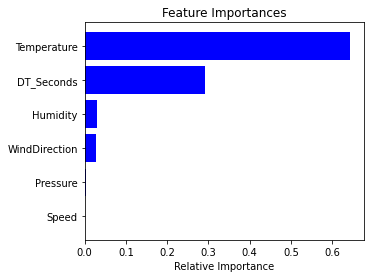

In [219]:
runing_model(X_Train,X_Test)

The above figure illustrates, Pressure and Speed have the lowest effect on the performance of the model and this fact is consistent with the results of the Corr-heatmap plot. Therefore from this step, these two variables were omitted. Regarding wind direction, there is a problem that makes it difficult to use this variable as an input of the model. Its values vary from 0 to 360 while in physics there is no difference between 0 and 360 or 359 degrees. It was decided to ignore this variable for further analysis,since its effect was not significant,

In [220]:
X_Train.drop(columns=['Speed','Pressure','WindDirection'],axis=1, inplace=True)
X_Test.drop(columns=['Speed','Pressure','WindDirection'],axis=1, inplace=True)
print(X_Train.shape,X_Test.shape)

(28096, 3) (7025, 3)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Investigating the effect of normalization on the results

MinmaxScaler was used in this prolem.Since the model involves three features with different ranges, it is necessary to define them at the same scale to see their relative effect on the model.For example the range of pressure, temperature and DT_Second is can be different. In some problems if run the model without normalization, some features may have a higher impact than others which will affect the performance of predictions by giving undue advantage for some variables over others.Therefore MinmaxScaler was utilized to have all inputs at the range of [0,1]

In [221]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
X_scaled= sc.fit_transform(X_Train)
X_Test_scaled=sc.transform(X_Test)
X_scaled.min( ),X_scaled.max() ,X_Test_scaled.min( ),X_Test_scaled.max()

(0.0, 1.0, -0.12121212121212133, 1.0)

In [222]:
runing_model(X_scaled,X_Test_scaled,plot=False)

Root Mean Squared Error: 126.37615239369133
Test Score:0.7647246466334611


The change in the accuracy after using the normalized features was not significant. Therefore in the next step, we try to tune the hyperparameters of the Gradient Boosting algorithm.

MinmaxScaler was used in this prolem.Since the model involves three features with different ranges, it is necessary to define them at the same scale to see their relative effect on the model.For example the range of pressure, temperature and DT_Second is can be different. In some problems if run the model without normalization, some features may have a higher impact than others which will affect the performance of predictions by giving undue advantage for some variables over others.Therefore MinmaxScaler was utilized to have all inputs at the range of [0,1]

# Hyperparameter tuning
Which parameters should be manipulated?

In [223]:

n_estim=[10,50,100,250,500]
max_depth=[3,5,7,9,11]
learning_rate=[0.01,0.1,1]
def sensitivity_function(hyper_param,learn_rate=False,max_depth=False,n_estimator=True):
    if n_estimator==True:
        MSE=[]
        RMSE=[]
        Test_score=[]
        for i in range(len(hyper_param)):
            GBoost=GradientBoostingRegressor(n_estimators=hyper_param[i])
            GBoost.fit(X_Train,y_Train)
            pred=GBoost.predict(X_Test)
            MSE.append(mean_squared_error(pred,y_Test))
            RMSE.append(np.sqrt(MSE))
            Test_score.append(GBoost.score(X_Test,y_Test))
            label="Number of estimator" 
    elif learn_rate==True:
        MSE=[]
        RMSE=[]
        Test_score=[]
        for i in range(len(hyper_param)):
            GBoost=GradientBoostingRegressor(learning_rate=hyper_param[i])
            GBoost.fit(X_Train,y_Train)
            pred=GBoost.predict(X_Test)
            MSE.append(mean_squared_error(pred,y_Test))
            RMSE.append(np.sqrt(MSE))
            Test_score.append(GBoost.score(X_Test,y_Test))
            label="learning rate" 
    elif max_depth==True:
        MSE=[]
        RMSE=[]
        Test_score=[]  
        for i in range(len(hyper_param)):
            GBoost=GradientBoostingRegressor(max_depth=hyper_param[i])
            GBoost.fit(X_Train,y_Train)
            pred=GBoost.predict(X_Test)
            MSE.append(mean_squared_error(pred,y_Test))
            RMSE.append(np.sqrt(MSE))
            Test_score.append(GBoost.score(X_Test,y_Test))
            label="max depth"       
                        
    plt.figure(figsize=(5,4))
    plt.title('Sensitivity Analysis')
    plt.plot(hyper_param, Test_score, color='b',marker="o")
    plt.xlabel(label)
    plt.ylabel("Accuracy_Test_score")
    plt.show()    
    
    

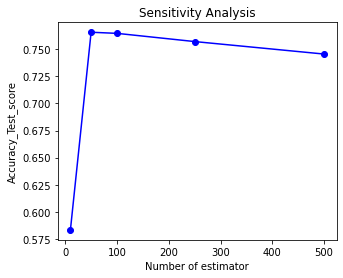

In [224]:
sensitivity_function(n_estim,learn_rate=False,max_depth=False,n_estimator=True)

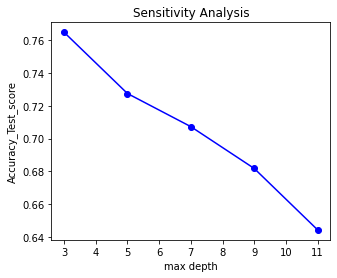

In [225]:
sensitivity_function(max_depth,learn_rate=False,max_depth=True,n_estimator=False)

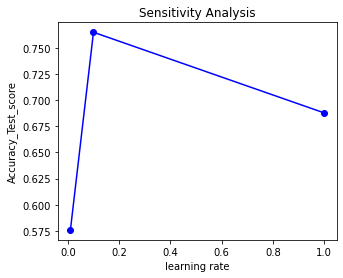

In [226]:
sensitivity_function(learning_rate,learn_rate=True,max_depth=False,n_estimator=False)

Based on the above results the selected hyperparameters can influence the accuracy of the model significantly.To find the optimum combination of the mentioned parameters, Gridsearch algorithm has been implemented here.

# GirdSearch
GridSearch algorithm can be used to find the best performance of the model by running the model for a wide range of variables.
In this approach several hyperparameters would be selected and for each one various states will be defined. For example, if there are three hyperparameters and for each one n, m, s states, then the total number of runs would be n*m*s. The grid search finds the best model performance by running the combination of these states. 

In [227]:
from sklearn.model_selection import GridSearchCV
GBoost=GradientBoostingRegressor()
parameters = {
    "n_estimators":[30,50,100,250],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1],
    "min_samples_leaf": [1, 0.5, 0.05]
}
GS= GridSearchCV(GBoost,parameters,cv=3)
GS.fit(X_Train,y_Train)
print("Best parameters are : ", GS.best_params_)
print("Best score is : ",GS.best_score_)
results = pd.DataFrame(GS.cv_results_)
results.head()

Best parameters are :  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Best score is :  0.854205599505225


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101499,0.003425,0.002473,0.000086,0.01,1,1,30,"{'learning_rate': 0.01, 'max_depth': 1, 'min_s...",0.244395,0.233289,0.204919,0.227534,0.016622,80
1,0.166991,0.006362,0.003033,0.000129,0.01,1,1,50,"{'learning_rate': 0.01, 'max_depth': 1, 'min_s...",0.342499,0.333936,0.302128,0.326188,0.017368,75
2,0.330075,0.009782,0.004416,0.000095,0.01,1,1,100,"{'learning_rate': 0.01, 'max_depth': 1, 'min_s...",0.479584,0.476855,0.432839,0.463093,0.021421,67
3,1.058164,0.181164,0.010353,0.003108,0.01,1,1,250,"{'learning_rate': 0.01, 'max_depth': 1, 'min_s...",0.616129,0.634799,0.598119,0.616349,0.014975,57
4,0.039113,0.031412,0.002148,0.000128,0.01,1,0.5,30,"{'learning_rate': 0.01, 'max_depth': 1, 'min_s...",-0.005479,-0.005560,-0.030435,-0.013825,0.011745,81


In [229]:
GBOOST_final=GS.best_estimator_
GB_score = GBOOST_final.score(X_Test, y_Test)
print('Test score after hyper parameter tuning is: ', GB_score)

Test score after hyper parameter tuning is:  0.7397811324300505


In [230]:

GBoost=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 50,min_samples_leaf=1)

GBoost.fit(X_Train,y_Train)
pred=GBoost.predict(X_Test)
r2_gboot=str(GBoost.score(X_Test,y_Test))
print("Test Score:" + r2_gboot )
print("Train Score:" + str(GBoost.score(X_Train,y_Train)))


Test Score:0.7397828932151964
Train Score:0.8966545666469723


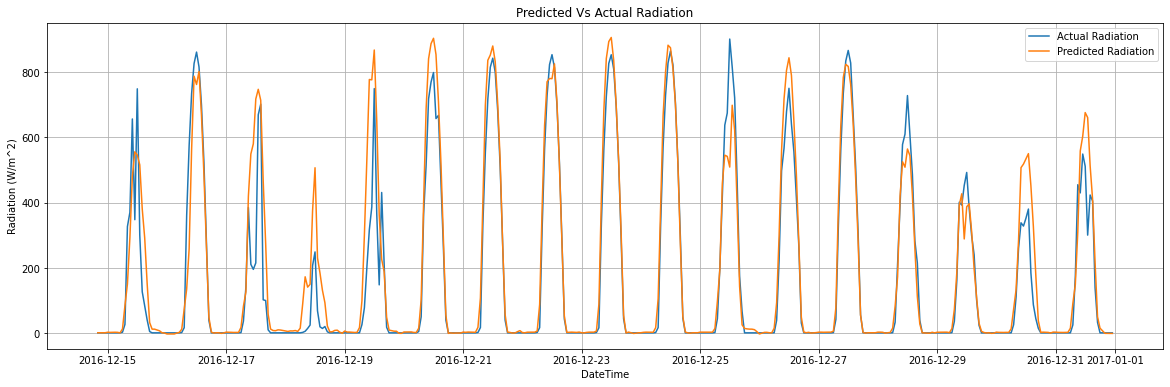

In [262]:
df_3 = SD_GBOOST[['DateTime', 'Temperature', 'Humidity', 'DT_Seconds', 'Radiation']].iloc[-5000:]
df_3['Predicted Radiation'] = GBOOST_final.predict(df_3[['Temperature', 'Humidity', 'DT_Seconds']])         # Creating new column of predicted radiation
df_3.set_index(df_3['DateTime'], inplace = True)
df_3 = df_3.resample('H').mean()                                                                  # Reasmpling data for smooth representation of plot
plt.figure(figsize= (20, 6))
plt.plot(df_3.index, df_3['Radiation'], label = 'Actual Radiation')
plt.plot(df_3.index, df_3['Predicted Radiation'], label = 'Predicted Radiation')
plt.title('Predicted Vs Actual Radiation')
plt.xlabel('DateTime')
plt.ylabel('Radiation (W/m^2)')
plt.grid()
plt.legend()

### Discussion

The gradient boosting model performs better than the linear regression model, as it is better in predicting the no radiation times, from sunset and sunrise. However, at majority of times, the model predicts the peak values higher than the actual values.

## Random Forest

After applying the linear regression model, it seems reasonable to apply more complex machine learning models to see if the prediction accuracy increases. One such model is Random Forest, which itself is a combination of simpler algorithms. It is more effective in fitting non-linear relationships between variables, therefore Random forest technique is applied next.

Adding large number of variables may increase the accuracy of the model, slightly, however, the the computational time also increases considerably, therefore as seen above during feature engineering of gradient boosting model, temperature, humidity and time of day have the highest importance. Thus, these variables will be used in the model and then hyper paramterization would be done to see if it helps in achieving better accuracy.

As discussed earlier, since the data is of time series type, logical approach to split test/train data is to use first 80% percent of data as train data and then use the last 20% as new data in the future and analyze the model's performance on that basis.

In [232]:
SD_new = SD #Creating new data set to be used for this part of project
SD_train = SD_new.iloc[0:round(SD_new.shape[0]*.8)][['Temperature', 'Humidity','DT_Seconds', 'Radiation']]
SD_test = SD_new.iloc[round(SD_new.shape[0]*.8):][['Temperature', 'Humidity','DT_Seconds', 'Radiation']]

In [233]:
#Extracting dependent and independent variales
x_train = SD_train.drop(columns = 'Radiation')
y_train = SD_train['Radiation']
x_test = SD_test.drop(columns = 'Radiation')
y_test = SD_test['Radiation']

In [234]:
rdf_model = RandomForestRegressor()   #Creating RandomForest model
# Training model and finding test train accuracy
rdf_model.fit(x_train, y_train)      
test_score = rdf_model.score(x_test, y_test)
train_score = rdf_model.score(x_train, y_train)
print('Score of test data: ', test_score)
print('Score of train data: ', train_score)

Score of test data:  0.6444550486872247
Score of train data:  0.9857267658453019


Training accuracy seems logical to be very high. The model does have a better test score than the linear model, the next step is to conduct hyper parameterization to see if it increases the accuracy of the model. Large difference between test and training score may be because the modl is overfitting.

### Hyper Parameter Tuning
Random Forest has many parameters that effect how the model uses the data to train. From research and studying the documentation of the RandomForest, following parameters were chosen to be used.
**Note**: Hyper paramter tuning takes considerable amount of time, therefore, only few parameters with limited values are chosen to see the effect on accuracy

**|Parameter|**-----------------------**|Default Value|**------------------------------**|Values Selected|**
1. n_estimators: The number trees in the forest. |100|,  |10, 20, 50, 100, 600, 700|
2. max_depth: The maximum depth of the tree. |None|, |5, 10, 15, 20, 40|
3. min_samples_leaf: The minimum number of samples required to be at a leaf node. |1|, |1.5, 1, 0.5, 0.05, 0.005|
4. max_features: The number of features to consider when looking for the best split |1|, |1, 'log2', 'sqrt'|

Cross Validation: The train set is further split into stated number of folds. Training data is done on n-1 folds and tested on the nth fold. This is repeated for n times for each set of parameter values, and average score is calculated. CV increases the computation time considerably, therefore, CV value of 3 is chosen.

In [235]:
#Initializing parameters for hyper parameter tuning
clf = GridSearchCV(rdf_model, {
    'n_estimators': [20, 50, 100, 300, 700],
    'max_depth': [5, 10, 20, 40],
    'min_samples_leaf': [1, 0.5, 0.05, 0.005],
    'max_features': [1, 'log2', 'sqrt']
}, cv = 3)

In [236]:
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 40],
                         'max_features': [1, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 0.5, 0.05, 0.005],
                         'n_estimators': [20, 50, 100, 300, 700]})

In [237]:
# Extracting results of the Grid Search
results = pd.DataFrame(clf.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101236,0.005061,0.006368,0.000252,5,1,1,20,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",0.768524,0.828598,0.782256,0.793126,0.025701,103
1,0.237568,0.004927,0.012242,0.000328,5,1,1,50,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",0.781874,0.822133,0.784126,0.796044,0.018470,93
2,0.496458,0.016296,0.024683,0.002765,5,1,1,100,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",0.772950,0.814004,0.789142,0.792032,0.016884,108
3,1.425193,0.058423,0.066007,0.001106,5,1,1,300,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",0.774917,0.819770,0.786019,0.793569,0.019074,100
4,3.306263,0.049171,0.155047,0.005769,5,1,1,700,"{'max_depth': 5, 'max_features': 1, 'min_sampl...",0.779221,0.818016,0.785556,0.794265,0.016993,97


From the results, next step is to plot the effect of different parameters on the accuracy, by keeping the values of other parameters as default.

In [238]:
# Extracting data
trees = results[['param_n_estimators', 'mean_test_score']][(results['param_max_depth'] == 40) & (results['param_max_features'] == 1) & (results['param_min_samples_leaf'] == 1)]
max_depth = results[['param_max_depth', 'mean_test_score']][(results['param_n_estimators'] == 100) & (results['param_max_features'] == 1) & (results['param_min_samples_leaf'] == 1)]
max_features = results[['param_max_features', 'mean_test_score']][(results['param_max_depth'] == 40) & (results['param_n_estimators'] == 100) & (results['param_min_samples_leaf'] == 1)]
min_leafs = results[['param_min_samples_leaf', 'mean_test_score']][(results['param_max_depth'] == 40) & (results['param_max_features'] == 1) & (results['param_n_estimators'] == 100)]

# Converting columns values to strings for x-axis
max_depth['param_max_depth'] = max_depth['param_max_depth'].astype(str)
max_features['param_max_features'] = max_features['param_max_features'].astype(str)

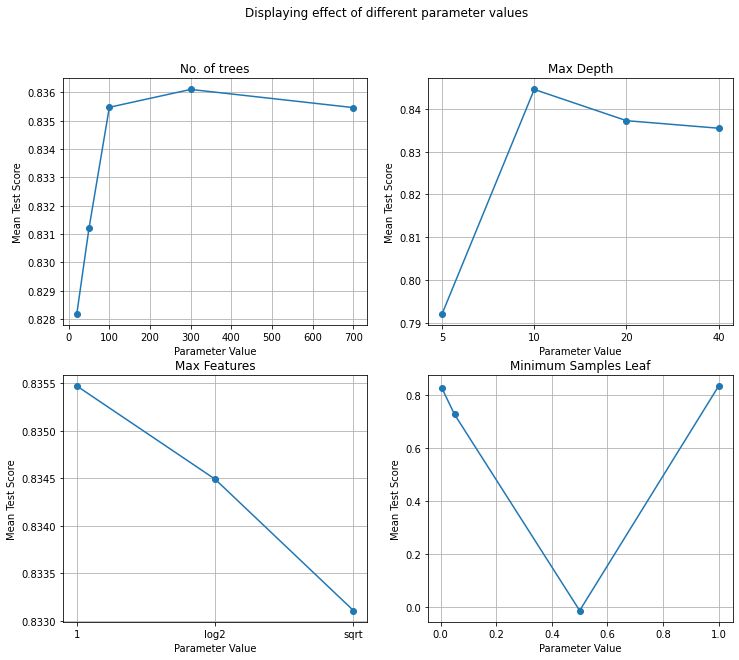

In [239]:
#Creating relevant plots
fig, axs = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Displaying effect of different parameter values')
i = 0
while i < 4:
    l = 1 if i >=2 else 0
    m = 1 if i == 1 or i == 3 else 0
    if i == 0:
        axs[l, m].plot(trees['param_n_estimators'], trees['mean_test_score'], 'o-')
        axs[l, m].set_title('No. of trees')
    elif i == 1:
        axs[l, m].plot(max_depth['param_max_depth'], max_depth['mean_test_score'], 'o-')
        axs[l, m].set_title('Max Depth')
    elif i == 2:
        axs[l, m].plot(max_features['param_max_features'], max_features['mean_test_score'], 'o-')
        axs[l, m].set_title('Max Features')
    elif i == 3:
        axs[l, m].plot(min_leafs['param_min_samples_leaf'], min_leafs['mean_test_score'], 'o-')
        axs[l, m].set_title('Minimum Samples Leaf')
    
    axs[l, m].set(xlabel="Parameter Value",ylabel="Mean Test Score")
    axs[l, m].grid()
    i+= 1

In [240]:
# Finding the best parameters from hyper tuning
print('Best parameters of the GridSearch are: ',clf.best_params_)

Best parameters of the GridSearch are:  {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 300}


In [241]:
# Using the best parameters to calculate test score.
rf = clf.best_estimator_
rf_score = rf.score(x_test, y_test)
print('Test score after hyper parameter tuning is: ', rf_score)

Test score after hyper parameter tuning is:  0.760330873779353


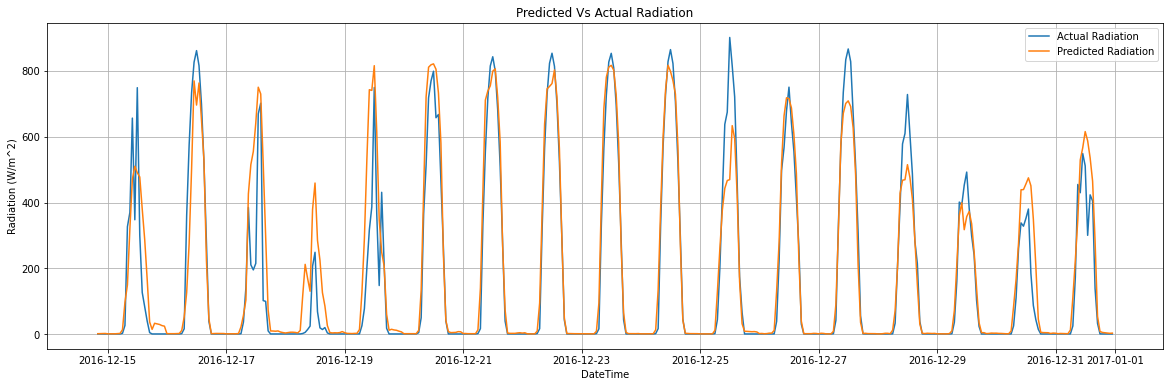

In [242]:
# Showing comparison between predicted and actual values for the last 15 days
df3 = SD_new[['DateTime', 'Temperature', 'Humidity', 'DT_Seconds', 'Radiation']].iloc[-5000:]
df3['Predicted Radiation'] = rf.predict(df3[['Temperature', 'Humidity', 'DT_Seconds']])         # Creating new column of predicted radiation
df3.set_index(df3['DateTime'], inplace = True)
df3 = df3.resample('H').mean()                                                                  # Reasmpling data for smooth representation of plot
plt.figure(figsize= (20, 6))
plt.plot(df3.index, df3['Radiation'], label = 'Actual Radiation')
plt.plot(df3.index, df3['Predicted Radiation'], label = 'Predicted Radiation')
plt.title('Predicted Vs Actual Radiation')
plt.xlabel('DateTime')
plt.ylabel('Radiation (W/m^2)')
plt.grid()
plt.legend()

### Discussion

Various set of parameter values were tested to see effect on the accuracy of the results. The accuracy of testing data increased from 64.5% to 76.1%. To further improve the algorithm more detailed undertanding of the RandomForest parameters is required, and more parameters need to be included in the GridSearch method to see their effect on the accuracy of the model.
As seen from the plot the model predicts the radiation trend more accurately than the linear regression model and predicts the no radiation time between sunset and sunrise very accurately, however, model is not very accurate in predicting the peak values.

# LSTM Model
After implemneting three previous machine learning algorithms, it was decided to conduct a netweork with intermediate layers of LSTM to boost the accuracy of the model.


showing that the data is kind of Time series

In [243]:
SD_LSTM=SD
SD_LSTM

,DateTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DT_Seconds
0,2016-09-01 00:00:08,2.580000,51.0,30.43,103.0,77.27,11.250000,8
1,2016-09-01 00:05:10,2.830000,51.0,30.43,103.0,153.44,9.000000,310
2,2016-09-01 00:10:32,2.606667,51.0,30.43,103.0,149.64,8.623333,632
3,2016-09-01 00:15:54,2.383333,51.0,30.43,103.0,145.84,8.246667,954
4,2016-09-01 00:20:06,2.160000,51.0,30.43,103.0,142.04,7.870000,1206
...,...,...,...,...,...,...,...,...
35116,2016-12-31 23:35:02,1.220000,41.0,30.34,83.0,238.94,6.750000,84902
35117,2016-12-31 23:40:01,1.210000,41.0,30.34,82.0,236.79,5.620000,85201
35118,2016-12-31 23:45:04,1.210000,42.0,30.34,81.0,218.28,7.870000,85504
35119,2016-12-31 23:50:03,1.190000,41.0,30.34,80.0,215.23,7.870000,85803


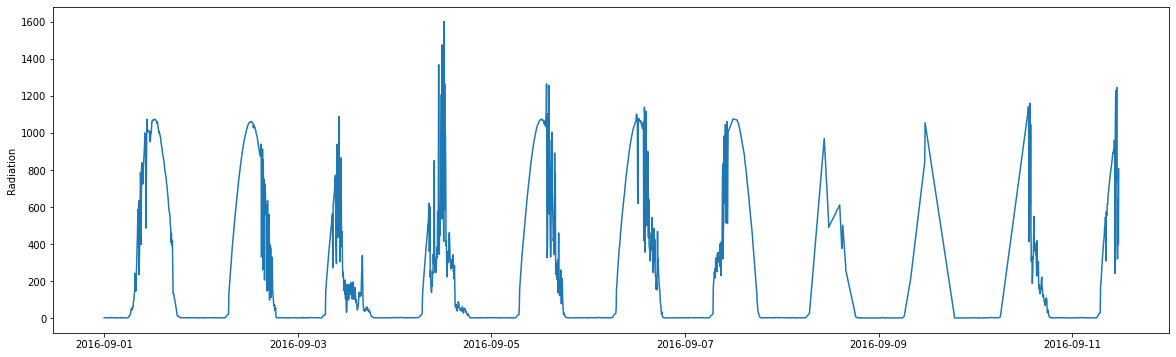

In [244]:
plt.figure(figsize= (20, 6))
plt.plot(SD_LSTM["DateTime"].iloc[:3000],SD_LSTM["Radiation"].iloc[:3000])
plt.ylabel("Radiation")
plt.show()    


Defining the size of training and testing data
the first %80 of data dedicated to training data and the next %20 was defined as testing data   

In [245]:
training_size=0.8
train_data=np.array(SD_LSTM['Radiation'].iloc[:int(training_size*len(SD["Radiation"]))]).reshape((-1,1))
test_data=np.array(SD['Radiation'].iloc[int(training_size*len(SD["Radiation"])):]).reshape((-1,1))
print(train_data.shape,test_data.shape)

(28096, 1) (7025, 1)


Normalization in the previous machine algorithm was incorporated, however, its influence was not considerable. In this approach, normalization was carried out.

In [246]:
sc = MinMaxScaler()
train_data= sc.fit_transform(train_data)
test_data=sc.transform(test_data)

As stated before, for the LSTM method, a sequence of data should be provided. Therefore in this step for both training and testing data, a sequence of data will be defined according to step size.

In [247]:
train_sequence=[]
train_labels=[]
test_sequence=[]
test_labels=[]

In [248]:
time_step=50 # ths step size means how many data will occupied in each sequence

In [249]:
for idx in range(len(train_data)-time_step):# defining training sequence
    train_sequence.append(train_data[idx:idx+time_step ])
    train_labels.append(train_data[idx+time_step])#for each training sequence the next data will be defined as train label  

In [250]:
for idx in range(len(test_data)-time_step):# defining testing sequence
    test_sequence.append(test_data[idx:idx+time_step ])
    test_labels.append(test_data[idx+time_step])

In [251]:
train_sequence=np.array(train_sequence)#  To feed to the network all sequences converted to numpy array
train_labels=np.array(train_labels)
test_sequence=np.array(test_sequence)
test_labels=np.array(test_labels)
print(train_sequence.shape, test_sequence.shape)

(28046, 50, 1) (6975, 50, 1)


In [252]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input, LSTM, Dropout

A simple sequential network was defined.For the inetrmediate layer LSTM layer was considered.The input layer should be as the size of sequence. then for LSTM model the number of units would be variable and something that can be tunned based on the accuracy of the model.Furthemore, a dropout layer was also defined.
The role of dropout layer is to exclode some neurons to prevent overfiting.the default value of it in keras is 0.2.

In [253]:
i=Input(shape=(time_step,1))
x=LSTM(units=64,return_sequences=True)(i)
x=Dropout(0.20)(x)
x=LSTM(units=32)(x)
y=Dense(units=1,activation='sigmoid')(x)

RNN_model= Model(i,y)
RNN_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 64)            16896     
                                                                 
 dropout_2 (Dropout)         (None, 50, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [254]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop=EarlyStopping("val_loss",patience=5, restore_best_weights=True)

In [255]:
RNN_model.compile(optimizer='adam', loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
RNN_model.fit(x=train_sequence,y=train_labels,epochs=15, validation_data=(test_sequence,test_labels),callbacks=early_stop,verbose = 1)

Epoch 1/15
877/877 [==============================] - 11s 10ms/step - loss: 0.0082 - rmse: 0.0907 - val_loss: 0.0027 - val_rmse: 0.0518
Epoch 2/15
877/877 [==============================] - 8s 9ms/step - loss: 0.0033 - rmse: 0.0578 - val_loss: 0.0020 - val_rmse: 0.0448
Epoch 3/15
877/877 [==============================] - 7s 8ms/step - loss: 0.0029 - rmse: 0.0543 - val_loss: 0.0017 - val_rmse: 0.0411
Epoch 4/15
877/877 [==============================] - 7s 8ms/step - loss: 0.0028 - rmse: 0.0525 - val_loss: 0.0017 - val_rmse: 0.0408
Epoch 5/15
877/877 [==============================] - 7s 8ms/step - loss: 0.0027 - rmse: 0.0515 - val_loss: 0.0017 - val_rmse: 0.0412
Epoch 6/15
877/877 [==============================] - 7s 8ms/step - loss: 0.0026 - rmse: 0.0508 - val_loss: 0.0019 - val_rmse: 0.0433
Epoch 7/15
877/877 [==============================] - 7s 8ms/step - loss: 0.0025 - rmse: 0.0502 - val_loss: 0.0015 - val_rmse: 0.0388
Epoch 8/15
877/877 [==============================] - 7s 8ms

Text(0, 0.5, 'RMSE')

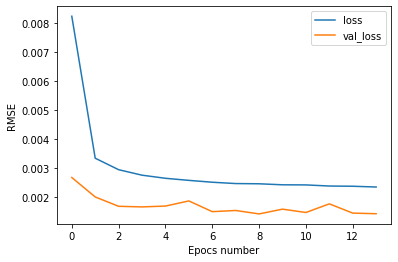

In [256]:
Model_history=pd.DataFrame(RNN_model.history.history)
Model_history[['loss','val_loss']].plot()
plt.xlabel('Epocs number')
plt.ylabel('RMSE')


218/218 [==============================] - 1s 3ms/step


Text(0.5, 0, 'Data number')

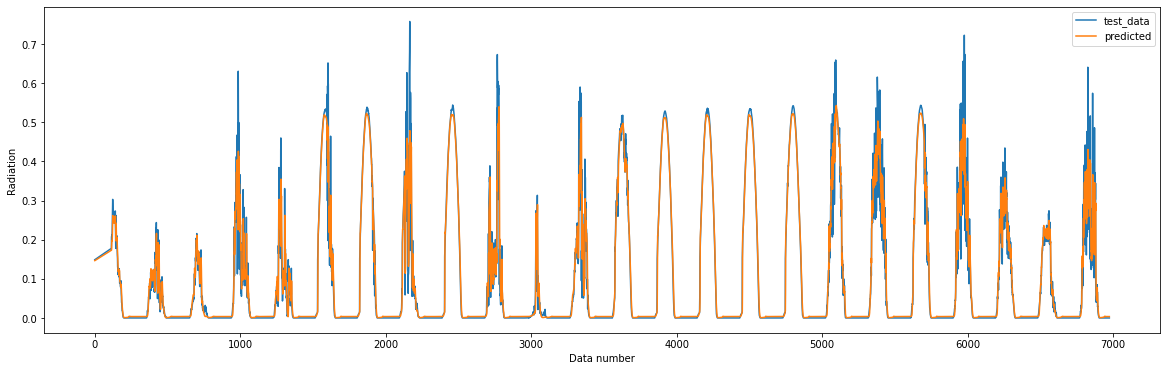

In [257]:
prediction_labels=RNN_model.predict(test_sequence)
plt.figure(figsize= (20, 6))
plt.plot(test_labels,label="test_data")
plt.plot(prediction_labels,label="predicted")
plt.legend()
plt.ylabel("Radiation")
plt.xlabel("Data number")

In [258]:
from sklearn.metrics import r2_score
r2_lstm=r2_score(test_labels, prediction_labels)
print("R2= ",r2_lstm)

R2=  0.9465379699232074


To retun the data to the initial scale and showing the results with higher resolution 

Text(0.5, 0, 'Data number')

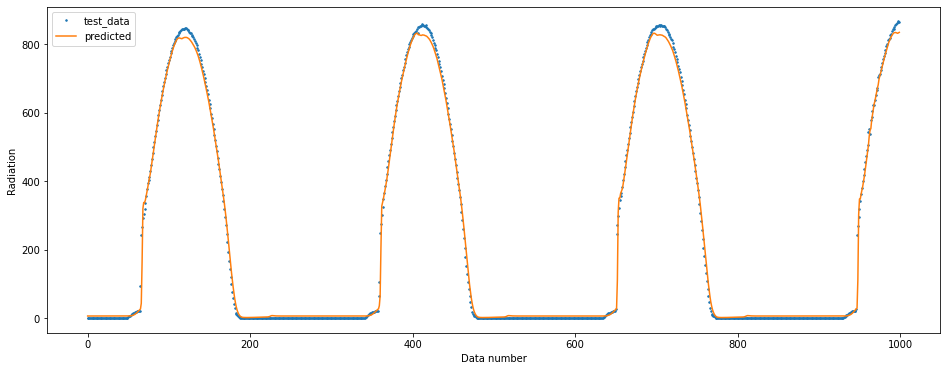

In [259]:
prediction_labels_trans = sc.inverse_transform(prediction_labels)
test_labels_trans=sc.inverse_transform(test_labels)
plt.figure(figsize= (16, 6))
plt.plot(test_labels_trans[3800:4800],"o",markersize=1.5,label="test_data")
plt.plot(prediction_labels_trans[3800:4800],label="predicted")
plt.legend()
plt.ylabel("Radiation")
plt.xlabel("Data number")

# Comparing Machine learning algorithms

In [260]:
accuracy = {'Linear Regression': 57.8,
'Random Forest': rf_score*100 , 'Gradient Boosting': 0.7645*100 ,'LSTM_Model': r2_lstm*100 
}

Text(0.5, 1.0, 'Accuracy Comparison of Different ML Models')

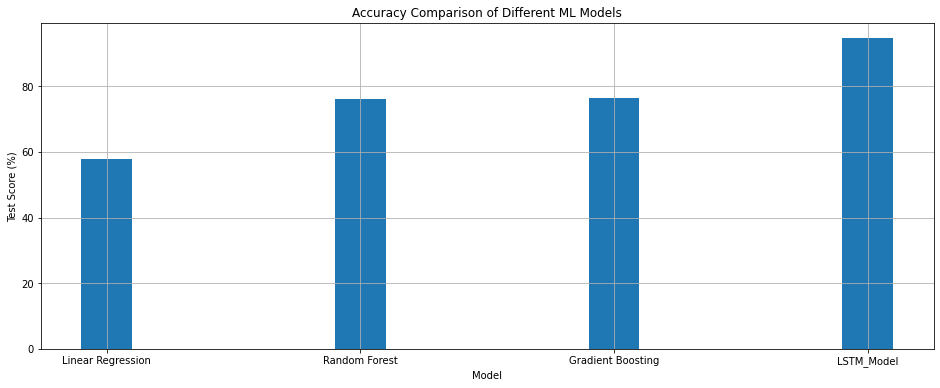

In [261]:
plt.figure(figsize= (16, 6))
plt.bar(accuracy.keys(), accuracy.values(), 0.2)
plt.xlabel('Model')
plt.ylabel('Test Score (%)')
plt.grid()
plt.title('Accuracy Comparison of Different ML Models')

## Conclusion

Initial analysis of dataset yielded that some readings were missing from the Time and Data column. Linear interpolation was performed to plug in the missing readings in DateTime (Data and Time were merged together) column. By using feature engineering, it has been demonstrated that temperature has the highest correlation with solar radiation.

To predict solar radiation, linear regression was used as a baseline model, yielding a score of 0.57, indicating that further improvement was required. The linear model was not accurate in predicting the solar radiation during the night, so more complex models were required to achieve our objective.

Temperature, Humidity and DT_Seconds were the most important features in training the model for predicting solar radiation. Random Forest produced an r2 score of 0.64, which was later improved by performing hyperparameter tuning, and then the r2 score improved to 0.76. Thereafter, gradient boosting algorithm was applied to train the model and produced an r2 score of 0.76. R2 score of 0.94 was achieved by implementing the LSTM model. LSTM was the most accurate model which could also predict the solar radiation during the night with much greater accuracy than other models.